# Requesting Argo data from Ifremer erddap, standard mode

In standard mode, the Argo data fetcher will filter variables through good QC flags and select the appropriate variables. 

This mode is intended for end-users of Argo measurements that do not want to be bothered by technical details.

***
Script prepared by [Guillaume Maze](http://github.com/gmaze)
<div>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>

In [1]:
import sys, os
import numpy as np
import xarray as xr

# 
sys.path.insert(0, os.path.abspath('..'))
from fetchers import ArgoDataFetcher

# For plots:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean


In [2]:
argo_loader = ArgoDataFetcher()
argo_loader

<datafetcher 'Not initialised'>
User mode: standard

# Example of data fetching for a specific region

## Zonal section, for a given year

In [3]:
box = [-80., 0., 26-0.5, 26+.5, 0, 1000, '2018-01-01','2018-12-31']
argo = argo_loader.region(box).to_xarray()
argo

<xarray.Dataset>
Dimensions:          (index: 77737)
Coordinates:
    latitude         (index) float64 26.08 26.08 26.08 ... 25.72 25.72 25.72
    longitude        (index) float64 -15.47 -15.47 -15.47 ... -63.1 -63.1 -63.1
    time             (index) datetime64[ns] 2018-01-01T20:16:00 ... 2018-12-30T15:47:00
  * index            (index) int64 0 1 2 3 4 5 ... 84907 84908 84909 84910 84911
Data variables:
    CYCLE_NUMBER     (index) float64 97.0 97.0 97.0 97.0 ... 236.0 236.0 236.0
    DATA_MODE        (index) <U1 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (index) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (index) int64 6901620 6901620 6901620 ... 6901183 6901183
    POSITION_QC      (index) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (index) float64 6.0 7.0 8.0 9.0 ... 964.8 975.2 985.1 993.2
    PRES_ERROR       (index) float64 2.4 2.4 2.4 2.4 2.4 ... 5.0 5.0 5.0 5.0 5.0
    PRES_QC          (index) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PSAL             (index) float64 36.81 36.81 36.81 ... 35.08 35.08 35.08
    PSAL_ERROR       (index) float64 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01 0.01
    PSAL_QC          (index) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (index) float64 19.76 19.76 19.76 ... 6.986 6.888 6.792
    TEMP_ERROR       (index) float64 0.002 0.002 0.002 0.002 ... 0.01 0.01 0.01
    TEMP_QC          (index) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (index) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:               ARGO
    DOI:                   http://doi.org/10.17882/42182
    Downloaded_from:       http://www.ifremer.fr/erddap
    Downloaded_by:         gmaze
    Download_date:         2020/02/26
    Download_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.c...
    Download_constraints:  [x=-80.00/0.00; y=25.50/26.50; z=0.0/1000.0; t=201...
    cache:                 cache/TSargo_28000_00000_02550_02650_00000_10000_2...
    history:               Variables selected according to DATA_MODE; Variabl...

/Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


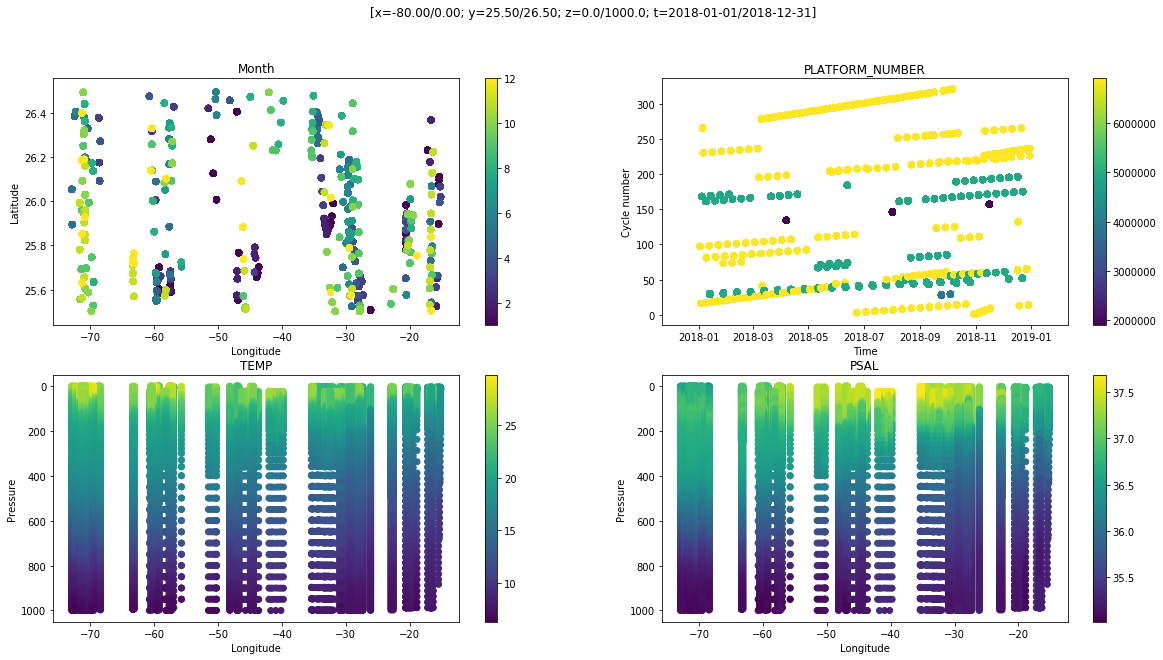

In [4]:
# Raw figure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(argo['longitude'], argo['latitude'], c=argo['time.month'])
plt.colorbar(sc, ax=ax[ix])
ax[ix].set_xlabel('Longitude')
ax[ix].set_ylabel('Latitude')
ax[ix].set_title('Month')

ix += 1
sc = ax[ix].scatter(argo['time'].values, argo['CYCLE_NUMBER'], c=argo['PLATFORM_NUMBER'])
plt.colorbar(sc, ax=ax[ix])
ax[ix].set_xlabel('Time')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('PLATFORM_NUMBER')

ix += 1
sc = ax[ix].scatter(argo['longitude'], argo['PRES'], c=argo['TEMP'])
plt.colorbar(sc, ax=ax[ix])
ax[ix].invert_yaxis()
ax[ix].set_xlabel('Longitude')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP')

ix += 1
sc = ax[ix].scatter(argo['longitude'], argo['PRES'], c=argo['PSAL'])
plt.colorbar(sc, ax=ax[ix])
ax[ix].invert_yaxis()
ax[ix].set_xlabel('Longitude')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL')

fig.suptitle(argo.attrs['Download_constraints']);

## Map of data around 200db depth for a single month

In [5]:
box = [-80., 0., 10., 65., 200-5., 200+5., '2018-01-01','2018-01-31']
argo = argo_loader.region(box).to_xarray()
argo

HTTPError: 500 Server Error: Internal Server Error for url: http://www.ifremer.fr/erddap/tabledap/ArgoFloats.csv?data_mode,latitude,longitude,position_qc,time,time_qc,direction,platform_number,cycle_number,pres,temp,psal,pres_qc,temp_qc,psal_qc,pres_adjusted,temp_adjusted,psal_adjusted,pres_adjusted_qc,temp_adjusted_qc,psal_adjusted_qc,pres_adjusted_error,temp_adjusted_error,psal_adjusted_error&longitude%3E=-80.0&longitude%3C=0.0&latitude%3E=10.0&latitude%3C=65.0&pres%3E=195.0&pres%3C=205.0&time%3E=1514764800.0&time%3C=1517356800.0

In [ ]:
plt.scatter(argo['longitude'], argo['latitude'], c=argo['PSAL'])
plt.colorbar(label=argo['PSAL'].attrs['units'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().grid()
plt.title("%s\n%s" % (argo['PSAL'].attrs['long_name'], argo.attrs['Download_constraints']));

## Deployment over a region ?

In [ ]:
# Retrieve all data for a region near the surface and a single month:
box = [-80., -45, 10, 45, 0, 10, '2018-01-01','2018-12-31']
argo = argo_loader.region(box).to_xarray()

# Then select only the first cycle number:
this = argo.where(argo['CYCLE_NUMBER']==1, drop=True)

# And group by WMOs:
this = this.reset_coords().groupby('PLATFORM_NUMBER').max()
this

In [ ]:
plt.scatter(this['longitude'], this['latitude'], c=this['time.dayofyear'])
plt.colorbar(label='Day of the year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().grid()
plt.title("%s" % argo.attrs['Download_constraints']);

# Example of data fetching for a specific float

In [ ]:
argo = argo_loader.float(6902746).to_xarray()
argo

In [ ]:
# Get basic information about the float:
print('This float has performed: %i profiles' % len(np.unique(argo['CYCLE_NUMBER'])))
print('This float operated between %s and %s' % (argo['time'].min().values, argo['time'].max().values))
print('This float profiles range from %0.1fdb to %0.1fdb' % (argo['PRES'].min(), argo['PRES'].max() ))

## Plot trajectory

In [ ]:
this = argo.reset_coords().groupby('CYCLE_NUMBER').min()
plt.plot(this['longitude'], this['latitude'], 'k-')
plt.scatter(this['longitude'], this['latitude'], c=this['CYCLE_NUMBER'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().grid()
plt.colorbar(label='CYCLE_NUMBER')
plt.title(argo.attrs['Download_constraints'])

## Water fall plots

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(argo['CYCLE_NUMBER'], argo['PRES'], c=argo['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=argo['TEMP'].attrs['units'])
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (argo['PRES'].attrs['long_name'], argo['PRES'].attrs['units']))
ax[ix].set_title(argo['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(argo['CYCLE_NUMBER'], argo['PRES'], c=argo['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=argo['PSAL'].attrs['units'])
# ax[ix].invert_yaxis()
ax[ix].set_xlabel(argo['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (argo['PRES'].attrs['long_name'], argo['PRES'].attrs['units']))
ax[ix].set_title(argo['PSAL'].attrs['long_name']);


## Super-imposed profiles

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(argo['TEMP'], argo['PRES'], c=argo['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(argo['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (argo['PRES'].attrs['long_name'], argo['PRES'].attrs['units']))
ax[ix].set_title(argo['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(argo['PSAL'], argo['PRES'], c=argo['CYCLE_NUMBER'])
plt.colorbar(sc, ax=ax[ix], label=argo['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].grid()
ax[ix].set_xlabel(argo['PSAL'].attrs['units'])
ax[ix].set_title(argo['PSAL'].attrs['long_name']);


## T/S diagram

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax = np.array(ax).flatten()
ix = 0
sc = ax[ix].scatter(argo['PSAL'], argo['TEMP'], c=argo['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].set_xlabel("%s [%s]" % (argo['PSAL'].attrs['long_name'], argo['PSAL'].attrs['units']))
ax[ix].set_ylabel("%s [%s]" % (argo['TEMP'].attrs['long_name'], argo['TEMP'].attrs['units']))
plt.title(argo.attrs['Download_constraints']);

# Example of data fetching for a specific profile

In [ ]:
argo = argo_loader.profile(6902746, 12).to_xarray()
argo

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
ax[ix].plot(argo['TEMP'], argo['PRES'], '.-')
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(argo['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (argo['PRES'].attrs['long_name'], argo['PRES'].attrs['units']))
ax[ix].set_title(argo['TEMP'].attrs['long_name'])

ix += 1
ax[ix].plot(argo['PSAL'], argo['PRES'], '.-')
ax[ix].grid()
ax[ix].set_xlabel(argo['PSAL'].attrs['units'])
ax[ix].set_title(argo['PSAL'].attrs['long_name']);

fig.suptitle(argo.attrs['Download_constraints']);

In [ ]:
# argo_loader = erddap_argo_wmo(WMO=[6902746, 6902747, 6902757, 6902766, 6902771, 6902772], cachedir='.')
# argo_loader = erddap_argo_wmo(WMO=[6902746], cachedir='.')
# argo_loader = erddap_argo_wmo(WMO=6902746, cachedir='.')
argo_loader = erddap_argo_wmo(WMO=6902746, CYC=12, cachedir='.')
argo_loader = erddap_argo_wmo(WMO=6902746, CYC=[12,14], cachedir='.')
argo_loader.define_constraints()
argo_loader.erddap.constraints

In [ ]:
argo = argo_loader.to_xarray(cache=True)
argo = argo_loader.filter_data_mode(argo)
argo = argo_loader.filter_qc(argo)
argo

In [ ]:
plt.scatter(argo['longitude'], argo['latitude'], c=argo['CYCLE_NUMBER'])

In [ ]:
plt.scatter(argo['CYCLE_NUMBER'], argo['PRES'], c=argo['TEMP'], vmin=11)
plt.gca().invert_yaxis()